# CSC3831 - Practical III
Hello Class, welcome to the third practical session. For this practical please read the information in the text blocks, run the code blocks in sequence, and attempt the optional challenges if you have time.

In this part of the course we will use a few Python packages. The packages used are as follows:
- [Numpy](https://numpy.org/): Numerical computing tool
- [Matplotlib](https://matplotlib.org/): Data visualisation tool
- [Seaborn](https://seaborn.pydata.org/index.html): Data visualisation tool
- [sklearn](https://scikit-learn.org/stable/): Machine learning toolset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification, make_blobs, make_moons

For the purpose of this practical we want to create a dataset which has a "normal" part and an "outlier" part so that we can apply our anomaly detection methods and be confident as to the classifcations they provide.

We will generate 2000 sample datapoints, 200 outliers and 1800 normal datapoints. Each datapoint will have two features (i.e., two dimensions like **x** and **y**). You can play around with this ratio by modifying the `outliers_fraction`.

In [2]:
n_samples = 2000
# Modify these settings to obtain different combinations of high density areas (clusters) and outliers
outliers_fraction = 0.1    ## values to use: 0.01, 0.05, 0.1
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
num_clusters = 10
stdev = 1
n_features = 2

print("Total samples: {s} outliers: {o}%, outliers expected:{ot}, inliers:{i}".format(s=n_samples, o=outliers_fraction, ot=n_outliers, i=n_inliers))
print("Blobs: centers: {c}, samples = {n}, std dev: {std}".format(c=num_clusters, n=n_inliers, std=stdev))

Total samples: 2000 outliers: 0.1%, outliers expected:200, inliers:1800
Blobs: centers: 10, samples = 1800, std dev: 1


Creating the synthetic Datset

In [3]:
samples, cluster_labels, centers = make_blobs(centers=num_clusters, cluster_std=stdev, random_state=0, n_samples=n_inliers, n_features=n_features, return_centers=True)

print("Clustered Samples: {s}".format(s=len(samples)))

## range of samples points -- used to determine the boundaries for outliers generation
boost = 1.1   ## extends the range covered by the clusters
xmin = min(samples[:,0])
xmax = max(samples[:,0])
ymin = min(samples[:,1])
ymax = max(samples[:,1])
print("xmin: {xmin:.2f}, xmax: {xmax:.2f}".format(xmin=xmin, xmax=xmax))
print("ymin: {ymin:.2f}, ymax: {ymax:.2f}".format(ymin=ymin, ymax=ymax))

low = min(xmin, ymin) * boost
high = max(xmax, ymax) * boost
print("low, high for outliers: {low:.2f}, {high:.2f}".format(low=low, high=high))

# Add n_outlier outliers, n_features each
rng = np.random.RandomState(42)
outliers = rng.uniform(low=low, high=high, size=(n_outliers, n_features))
print("Number of Outliers Produced: {o}".format(o=len(outliers)))

## some of the outliers are within clusters.
## we use the distance from centers to remove some of the outliers, as those will never be detected
distances = dict()
out = dict()
i=0
for o in outliers:
    mindist = 1000000
    for c in centers:
        dist = np.linalg.norm(o-c)  ## euclidean distance
        if dist < mindist:
            mindist = dist
    out[i] = o
    distances[i]= mindist
    i = i + 1

distarray = np.asarray(list(distances.values()))
meandist  = np.mean(distarray)
vardist   = np.std(distarray)

print("Outliers Distances from Centres: mean {m:.2f}, var {v:.2f}".format(m=meandist, v=vardist))

## remove points that are too close to the centers

alpha = 0.9 ## larger than removes points that are more distant from centroids

removed = 0
for i in range(len(outliers)):
    if distances[i] < meandist-vardist * alpha:
        print("removing {d:.2f}".format(d=distances[i]))
        out.pop(i)
        removed = removed + 1

final_outliers = np.asarray(list(out.values()))
print("removed {r} outliers. {n} remaining outliers ".format(r=removed, n=len(final_outliers)))

Clustered Samples: 1800
xmin: -12.41, xmax: 11.95
ymin: -10.54, ymax: 10.83
low, high for outliers: -13.65, 13.15
Number of Outliers Produced: 200
Outliers Distances from Centres: mean 4.62, var 2.57
removing 1.82
removing 1.50
removing 1.80
removing 0.51
removing 0.48
removing 1.90
removing 1.23
removing 1.54
removing 1.59
removing 1.46
removing 1.22
removing 1.54
removing 1.87
removing 2.30
removing 1.14
removing 1.25
removing 1.36
removing 2.30
removing 1.29
removing 0.59
removing 2.04
removing 1.97
removing 1.37
removing 1.51
removing 2.12
removing 2.29
removing 2.29
removing 0.49
removing 2.06
removing 1.88
removing 0.88
removing 1.58
removing 1.20
removing 1.58
removing 1.44
removing 2.09
removing 1.72
removing 1.85
removing 1.95
removing 1.85
removing 2.29
removing 0.69
removing 1.07
removing 0.20
removing 1.23
removed 45 outliers. 155 remaining outliers 


Visualising the challenge dataset we can see that by removing outliers inside of the clusters, we can get a nicer differentiation between an "outlier" and "inlier".

**Note**: There are outliers which appear close to the inlier clusters. In reality we wouldn't classify these values of outliers, but for the purpose of this practical we need nicely classified outliers and inliers to compare against our methods.

AttributeError: 'function' object has no attribute 'get_legend_hanles_lables'

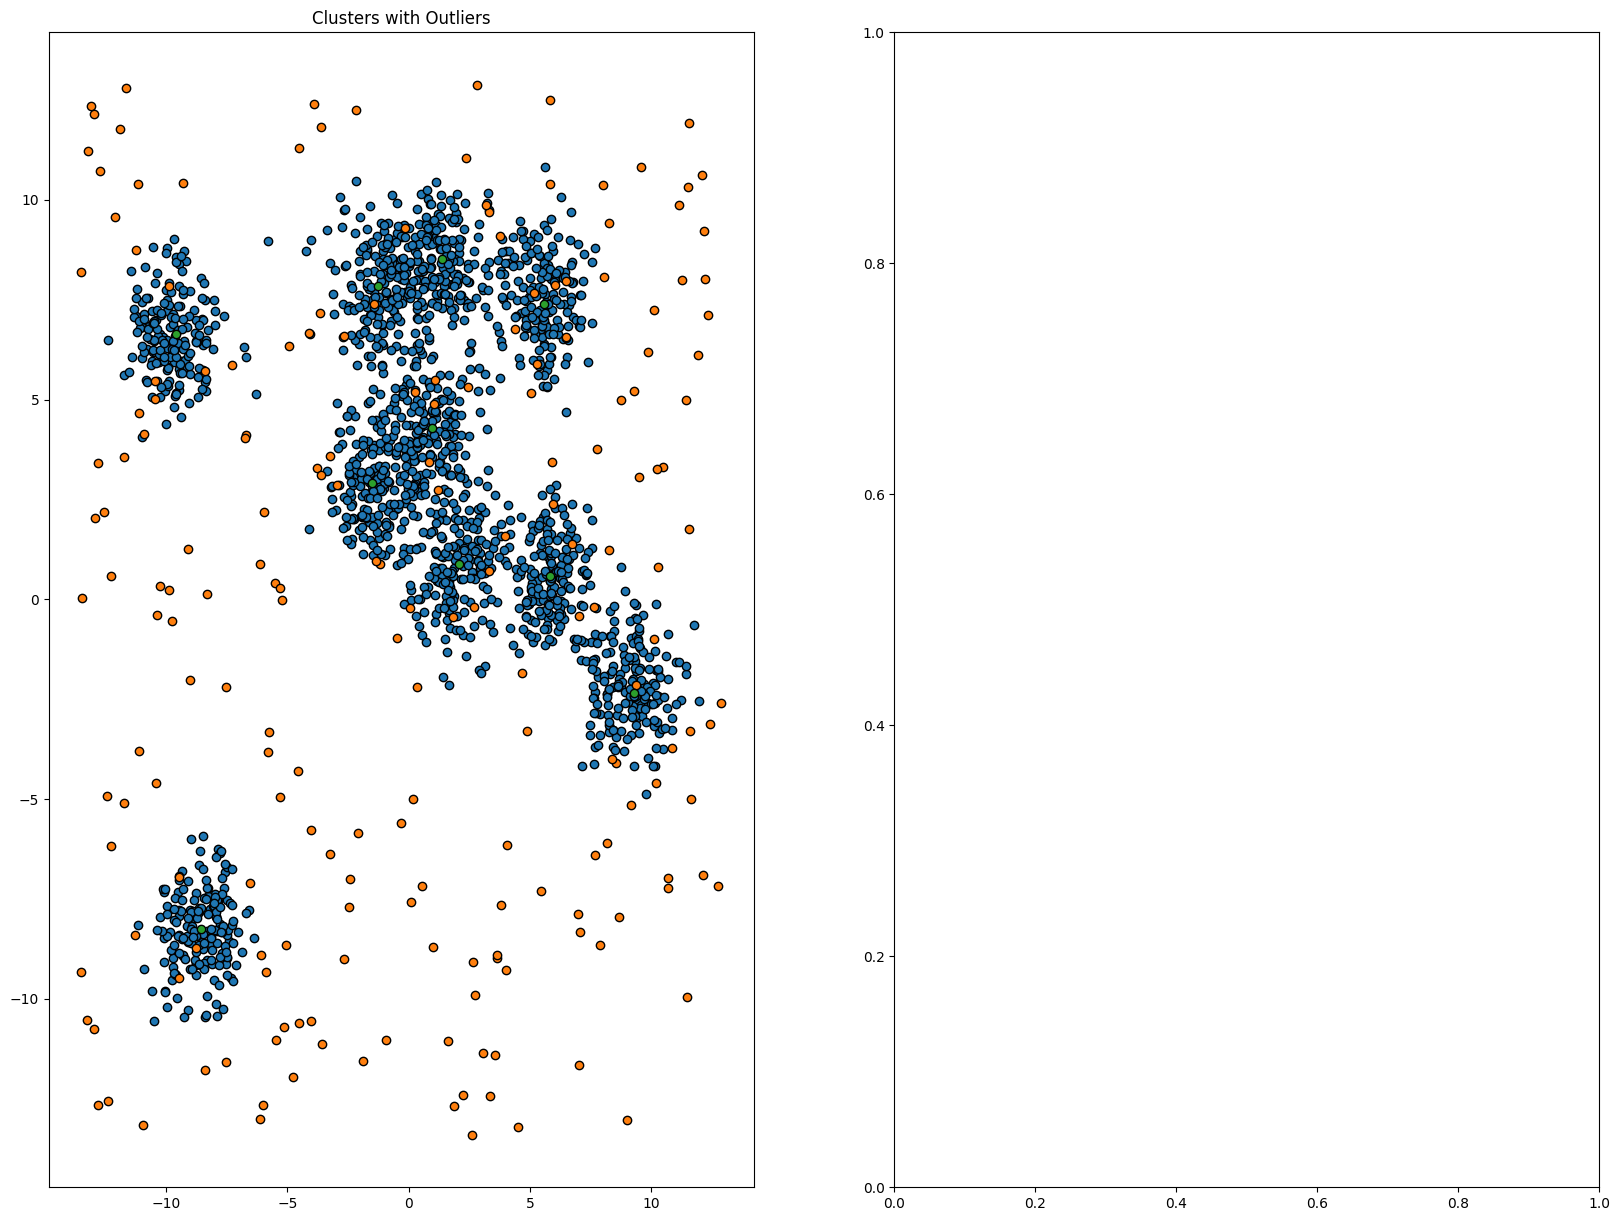

In [4]:
fig, ax = plt.subplots(1,2, figsize=(20,15))

ax[0].scatter(samples[:,0], samples[:,1], edgecolor="k")
ax[0].scatter(outliers[:,0], outliers[:,1], edgecolor="k")
ax[0].scatter(centers[:,0], centers[:,1], edgecolor="k")
ax[0].set_title("Clusters with Outliers")
handles_0, legend_0 = ax[0].get_legend_handles_labels()
# ax[0].legend(handles = handles_0, labels=["outliers", "inliers"], title="true class")


ax[1].scatter(samples[:,0], samples[:,1], edgecolor="k")
ax[1].scatter(final_outliers[:,0], final_outliers[:,1], edgecolor="k")
ax[1].scatter(centers[:,0], centers[:,1], edgecolor="k")
ax[1].set_title("Clusters with Outliers After Removing Points Close to Cluster Centers")

We want to remove outliers that present too close to the center of our clusters because in actual data these values would most likely be considered inliers or valid data.

In [7]:
## this is the set you will use for anomaly detection, the first 1800 data points are normal values, with the last 179 being outliers.
full_set = np.concatenate([samples, final_outliers], axis=0)
num_outliers = len(final_outliers)
# print(full_set[-num_outliers:])

Now for this next bit you'll be using the `full_set` data, and the `final_outlier` as your set of "ground truth" outliers.

### Local Outlier Factor
[Local outlier factor](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor) calculates the "outlierness" of datapoints by checking the relative density of a datapoint and to its neigbours. As we discussed in class, determining the number of neighbours to survey is crucial to getting a good detection. "n_neighbors" is the number of neighbours LOF surveys. We'll use the [scikit tutorial for LOF](https://scikit-learn.org/1.5/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py) to assist in analysing our data.

In [8]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)
# The fit_predict function will classify the points as either inliers (1) or an outlier (-1)
y_pred = clf.fit_predict(full_set)
# Lets check the outlier points to see if they were misidentified
n_errors = (y_pred[-num_outliers:] != -1).sum()

x_scores = clf.negative_outlier_factor_

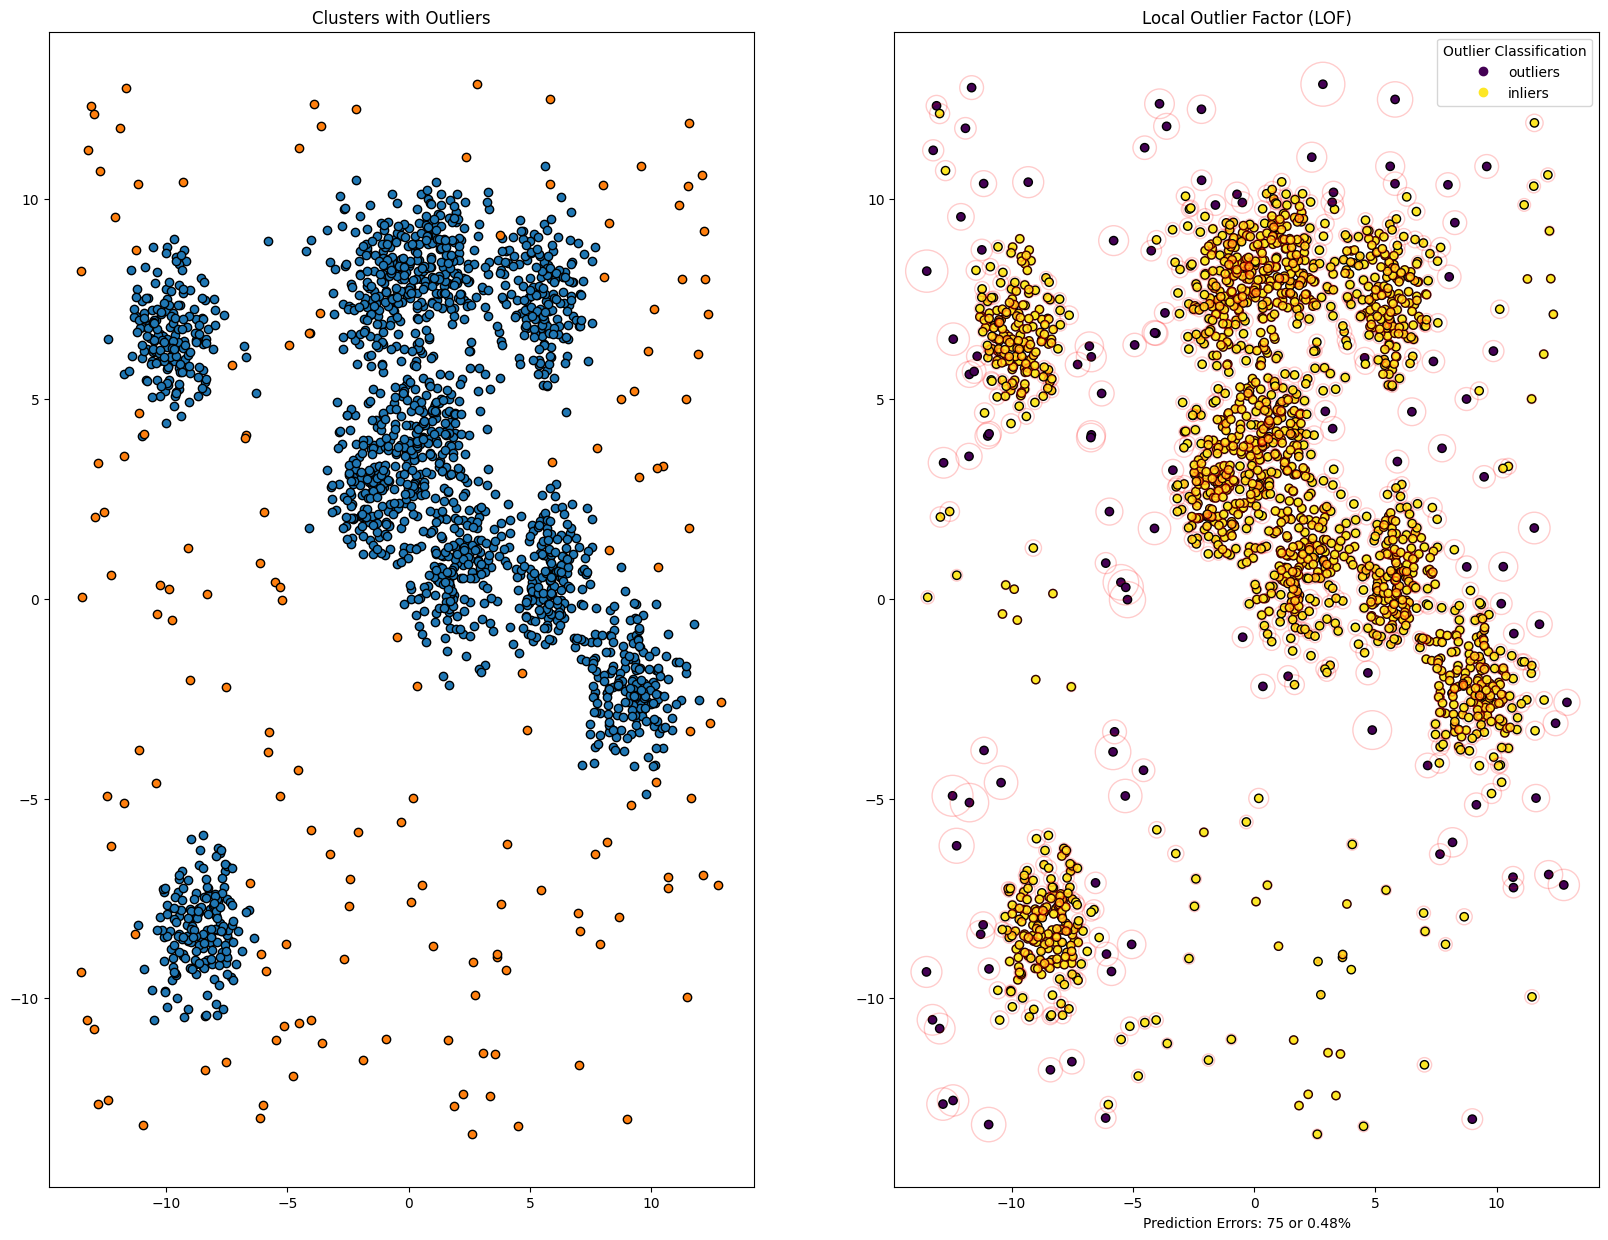

In [29]:
fig, ax = plt.subplots(1,2, figsize=(20,15))

ax[0].scatter(samples[:,0], samples[:,1], edgecolor="k", label="Inliers")
ax[0].scatter(final_outliers[:,0], final_outliers[:,1], edgecolor="k", label="Outliers")
ax[0].set_title("Clusters with Outliers")
# Plot the inliers
scatter = ax[1].scatter(x=full_set[:, 0], y=full_set[:, 1], c=y_pred, label="Data points", edgecolor="k")
# plot circles with radius proportional to the outlier scores
radius = (x_scores.max() - x_scores) / (x_scores.max() - x_scores.min())
scatter_radius = ax[1].scatter(
    full_set[:, 0],
    full_set[:, 1],
    s=1000 * radius,
    alpha=0.2,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
ax[1]
ax[1].set_xlabel("Prediction Errors: {n} or {per_n:.2f}%".format(n=n_errors, per_n=n_errors/num_outliers))
ax[1].set_title("Local Outlier Factor (LOF)")
handles, lables = scatter.legend_elements()
plt.legend(handles = handles, labels=["outliers", "inliers", ], title="Outlier Classification")
plt.show()

As we've discussed in class, LOF is very good at identifying outliers on the edge of clusters. By looking at the relative reachability of a node to it's neihgbours, LOF can define the edge cases which other outlier methods may find difficult.

By tuning the number of nearest neighbours queried `n_neighbors` we can change how LOF performs in identifying outliers we know are in the original dataset.

**NOTE**: Because the original data we generated has synthetic outliers, which in some cases are as close to the clusters are the inliers, by playing around with `n_neighbors` you will never get a perfect prediction (i.e. "Prediction Errors: 0"). Have a play around but don't worry if you can't achieve perfect prediction.


### Isolation Forest
We will follow [this tutorial](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html) for isolation forest. Similarly to LOF, we have a few parameters which control the classifciation of inliers and outliers. Isolation forest works by generating random forest splits with roughly equal groups to decide if values are similar or different from each other, you can play around with the parameters below and read through the turorial as well as the [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) page on scikit to see how these parameters work.  

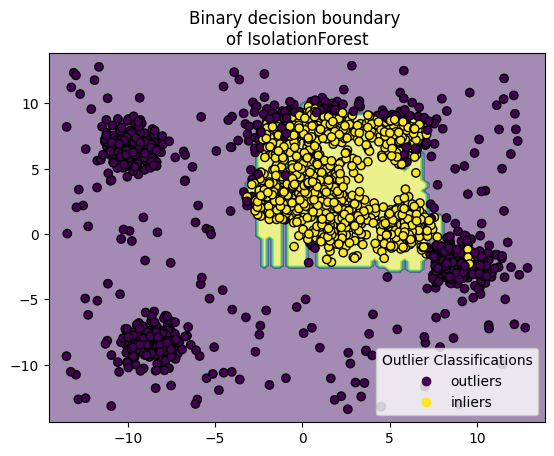

In [39]:
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
clf = IsolationForest(n_estimators=10, max_samples=100)
y_pred = clf.fit_predict(full_set)
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    full_set,
    response_method="predict",
    alpha=0.5,
)
scatter = disp.ax_.scatter(full_set[:, 0], full_set[:, 1], c=y_pred, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
handles, lables = scatter.legend_elements()
plt.legend(handles = handles, labels=["outliers", "inliers"], title="Outlier Classifications")
plt.show()

Now we've covered a few algorithmic methods for outlier detection you should be gaining a sense of how this works. Please try out the [One-Class SVM method](https://scikit-learn.org/1.5/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py) on the `full_set` as an extension of the sessions material, but understanding how the two prior methods work should be sufficient for your coursework.